#### Objective
##### The purpose of this assignment is to explore benchmark optimization functions and apply Genetic Algorithms (GAs) for finding their minima. 
##### You will select and implement two multimodal functions in Python, optimize them using a configurable GA, and conduct a statistical performance analysis of different GA configurations

## 1-2. Function selection + implementation and visualization

### Cross-In-Tray Function

The Cross-In-Tray function is a multimodal funnction that has multiple global minima.

The input domain is:

$$
x_i \in [-10, 10] \quad \text{for } i = 1, 2
$$

The function is defined as:

$$
f(\mathbf{x}) = -0.0001 \left( \left| \sin(x_1) \sin(x_2) \exp \left( \left| 100 - \frac{\sqrt{x_1^2 + x_2^2}}{\pi} \right| \right) \right| + 1 \right)^{0.1}
$$


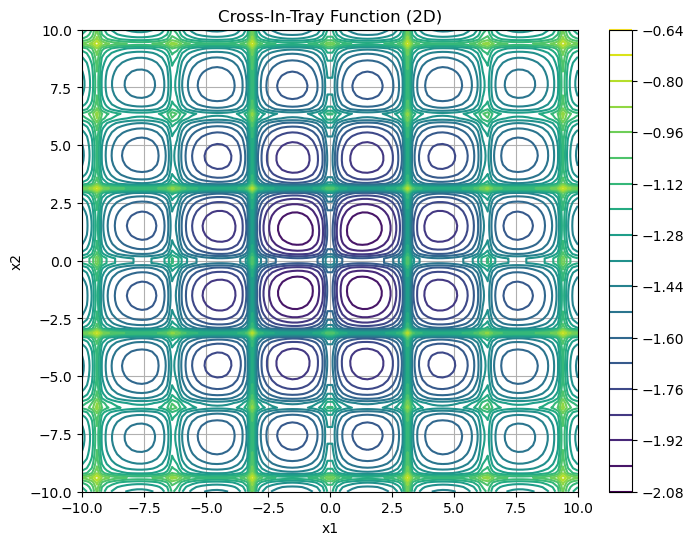

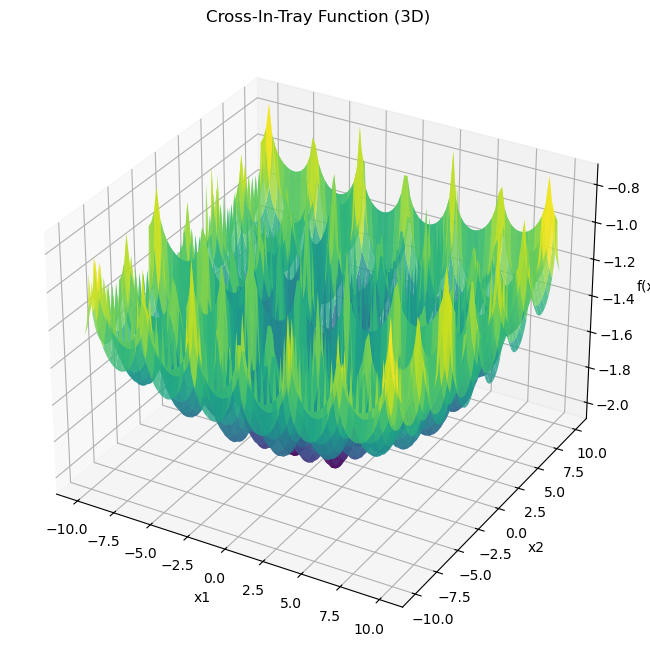

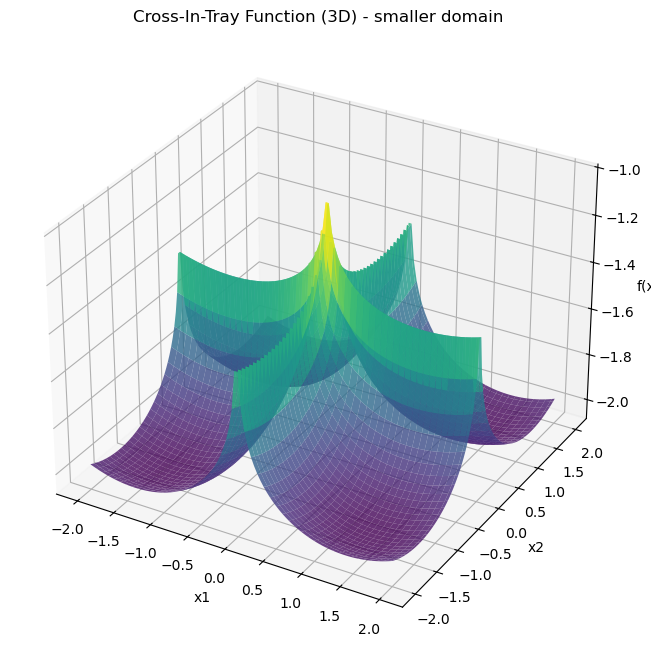

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# implementation of the Cross-In-Tray function
def cross_in_tray(x):
    return -0.0001 * (np.abs(np.sin(x[0]) * np.sin(x[1]) * np.exp(np.abs(100 - np.sqrt(x[0]**2 + x[1]**2) / np.pi))) + 1)**0.1

# plot the function in 2D
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate the function values
Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = cross_in_tray([X1[i, j], X2[i, j]])

# Create 2D contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Cross-In-Tray Function (2D)')
plt.grid(True)
plt.show()

# Create 3D surface plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Cross-In-Tray Function (3D)')
plt.show()


x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = cross_in_tray([X1[i, j], X2[i, j]])

# Create 3D surface plot (smaller domain to see the "cross")
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Cross-In-Tray Function (3D) - smaller domain')
plt.show()



### Drop-Wave Function

The Drop-Wave function is a multimodal function that is very complex and has a global minimum at the origin.

The input domain is:

$$
x_i \in [-5.12, 5.12] \quad \text{for } i = 1, 2
$$

The function is defined as:

$$
f(\mathbf{x}) = -\frac{1 + \cos\left(12 \sqrt{x_1^2 + x_2^2} \right)}{0.5(x_1^2 + x_2^2) + 2}
$$


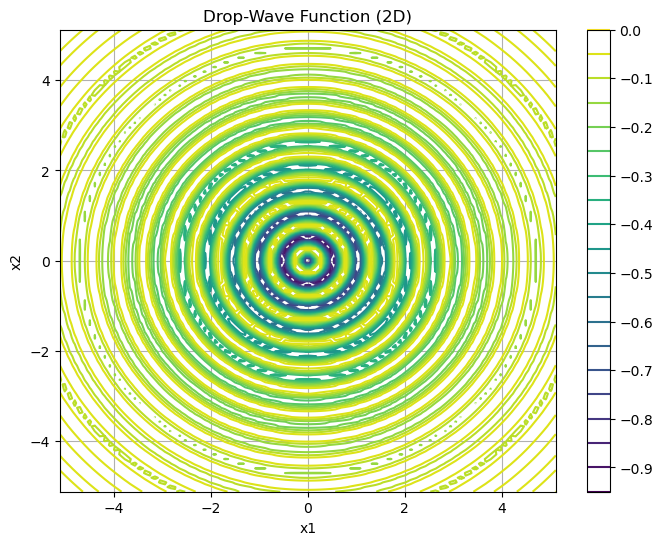

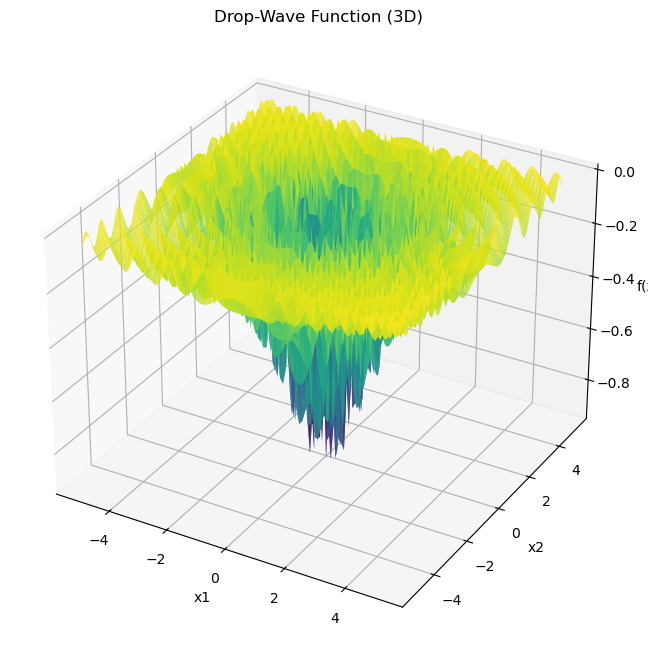

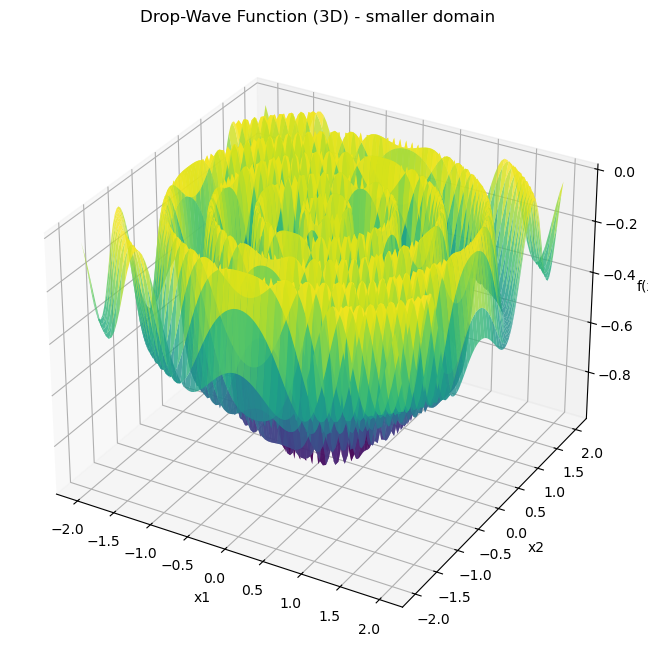

In [4]:
# implementation of the Drop-Wave function
def drop_wave(x):
    return - (1 + np.cos(12 * np.sqrt(x[0]**2 + x[1]**2))) / (0.5 * (x[0]**2 + x[1]**2) + 2)

# plot the function in 2D
x1 = np.linspace(-5.12, 5.12, 100)
x2 = np.linspace(-5.12, 5.12, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = drop_wave([X1[i, j], X2[i, j]])

# Create 2D contour plot
plt.figure(figsize=(8, 6))
contour = plt.contour(X1, X2, Z, levels=20)
plt.colorbar(contour)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Drop-Wave Function (2D)')
plt.grid(True)
plt.show()

# Create 3D surface plot
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Drop-Wave Function (3D)')
plt.show()


# smaller domain to illustrate the characteristic features
x1 = np.linspace(-2, 2, 100)
x2 = np.linspace(-2, 2, 100)
X1, X2 = np.meshgrid(x1, x2)

Z = np.zeros_like(X1)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = drop_wave([X1[i, j], X2[i, j]])

# Create 3D surface plot (smaller domain to see the "drop")
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x)')
ax.set_title('Drop-Wave Function (3D) - smaller domain')
plt.show()


## 3. Generic Algorithm Optimisation

Testing Drop Wave Function with Real-valued GA (Arithmetic Crossover):
The minimum for this function is -1 at (0,0)
Generation 0: Best fitness = -0.737732
Generation 10: Best fitness = -0.936245
Generation 20: Best fitness = -0.936245
Generation 30: Best fitness = -0.936245
Generation 40: Best fitness = -0.936245
Generation 50: Best fitness = -0.936245
Generation 60: Best fitness = -0.936245
Generation 70: Best fitness = -0.936245
Generation 80: Best fitness = -0.936245
Generation 90: Best fitness = -0.936245
Best solution: [0.22360185360020618, 0.46970888702423574]
Best fitness: -0.9362453278079418

Testing Cross-in-Tray Function with Binary GA (2-point Crossover):
Generation 0: Best fitness = -2.042258
Generation 10: Best fitness = -2.061727
Generation 20: Best fitness = -2.062422
Generation 30: Best fitness = -2.062595
Generation 40: Best fitness = -2.062605
Generation 50: Best fitness = -2.062600
Generation 60: Best fitness = -2.062611
Generation 70: Best fitness = -2.062541
Genera

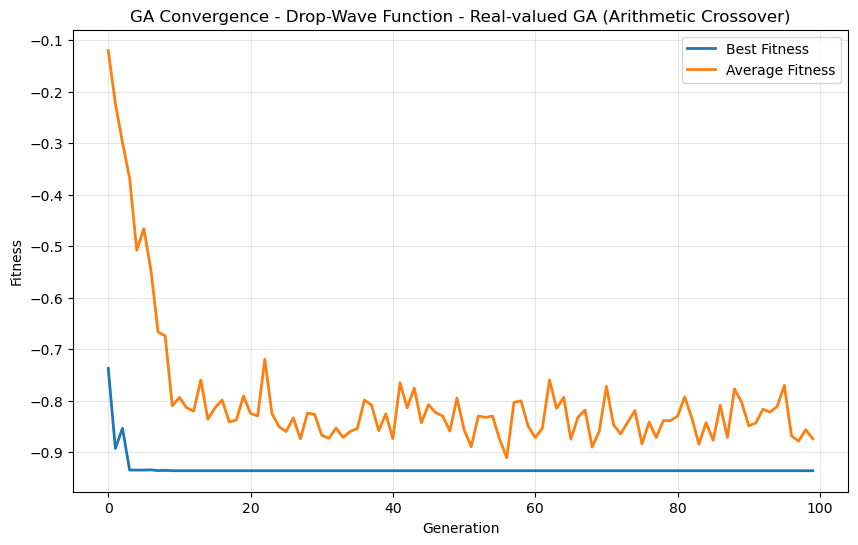

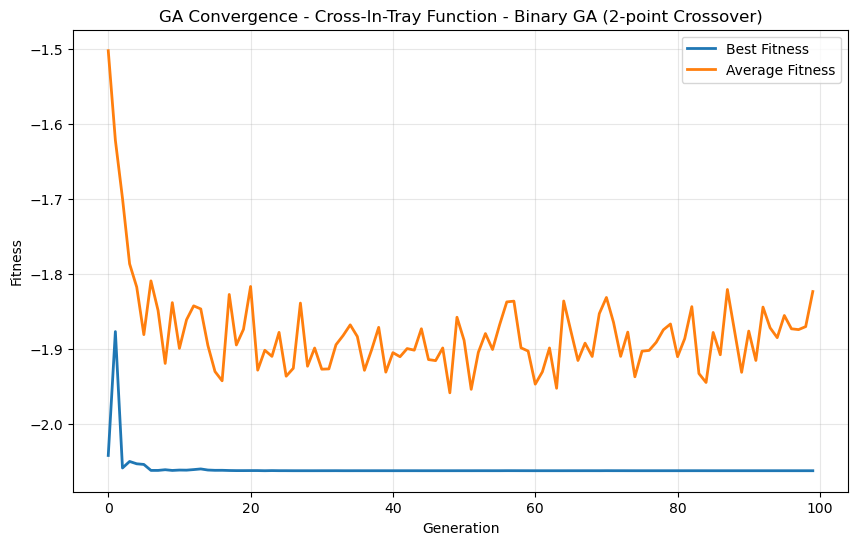

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import Callable, List, Tuple, Union

class GeneticAlgorithm:
    def __init__(self, 
                 fitness_function: Callable,
                 bounds: List[Tuple[float, float]],
                 population_size: int = 50,
                 num_generations: int = 100,
                 crossover_rate: float = 0.8,
                 mutation_rate: float = 0.1,
                 representation: str = 'real',  # 'binary' or 'real'
                 crossover_type: str = 'arithmetic',  # for real: 'arithmetic', 'blx_alpha'; for binary: '1point', '2point'
                 binary_bits: int = 16,  # bits per variable for binary representation
                 blx_alpha: float = 0.5,  # alpha parameter for BLX-alpha crossover
                 tournament_size: int = 3,
                 maximize: bool = False):
        
        self.fitness_function = fitness_function
        self.bounds = bounds
        self.num_variables = len(bounds)
        self.population_size = population_size
        self.num_generations = num_generations
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.representation = representation
        self.crossover_type = crossover_type
        self.binary_bits = binary_bits
        self.blx_alpha = blx_alpha
        self.tournament_size = tournament_size
        self.maximize = maximize
        
        # For binary representation
        self.total_bits = self.num_variables * self.binary_bits
        
        # History tracking
        self.best_fitness_history = []
        self.average_fitness_history = []
        
    def initialize_population(self):
        """Initialize population based on representation type"""
        if self.representation == 'binary':
            return self._initialize_binary_population()
        else:
            return self._initialize_real_population()
    
    def _initialize_binary_population(self):
        """Initialize binary population"""
        population = []
        for _ in range(self.population_size):
            individual = [random.randint(0, 1) for _ in range(self.total_bits)]
            population.append(individual)
        return population
    
    def _initialize_real_population(self):
        """Initialize real-valued population"""
        population = []
        for _ in range(self.population_size):
            individual = []
            for i in range(self.num_variables):
                lower, upper = self.bounds[i]
                value = random.uniform(lower, upper)
                individual.append(value)
            population.append(individual)
        return population
    
    def binary_to_real(self, binary_individual):
        """Convert binary representation to real values"""
        real_individual = []
        for i in range(self.num_variables):
            start_bit = i * self.binary_bits
            end_bit = start_bit + self.binary_bits
            binary_segment = binary_individual[start_bit:end_bit]
            
            # Convert binary to decimal
            decimal_value = 0
            for j, bit in enumerate(binary_segment):
                decimal_value += bit * (2 ** (self.binary_bits - 1 - j))
            
            # Scale to bounds
            lower, upper = self.bounds[i]
            max_decimal = 2**self.binary_bits - 1
            real_value = lower + (decimal_value / max_decimal) * (upper - lower)
            real_individual.append(real_value)
        
        return real_individual
    
    def real_to_binary(self, real_individual):
        """Convert real values to binary representation"""
        binary_individual = []
        for i, value in enumerate(real_individual):
            lower, upper = self.bounds[i]
            # Scale to [0, 1]
            normalized = (value - lower) / (upper - lower)
            # Convert to integer in range [0, 2^bits - 1]
            max_decimal = 2**self.binary_bits - 1
            decimal_value = int(normalized * max_decimal)
            
            # Convert to binary
            binary_segment = []
            for j in range(self.binary_bits):
                bit = (decimal_value >> (self.binary_bits - 1 - j)) & 1
                binary_segment.append(bit)
            
            binary_individual.extend(binary_segment)
        
        return binary_individual
    
    def evaluate_fitness(self, population):
        """Evaluate fitness for entire population"""
        fitness_values = []
        for individual in population:
            if self.representation == 'binary':
                real_individual = self.binary_to_real(individual)
            else:
                real_individual = individual
            
            # Ensure individual is within bounds
            for i, value in enumerate(real_individual):
                lower, upper = self.bounds[i]
                real_individual[i] = max(lower, min(upper, value))
            
            fitness = self.fitness_function(real_individual)
            if self.maximize:
                fitness_values.append(fitness)
            else:
                fitness_values.append(-fitness)  # Minimize by maximizing negative
        
        return fitness_values
    
    def tournament_selection(self, population, fitness_values):
        """Tournament selection"""
        selected = []
        for _ in range(self.population_size):
            tournament_indices = random.sample(range(len(population)), self.tournament_size)
            tournament_fitness = [fitness_values[i] for i in tournament_indices]
            winner_index = tournament_indices[np.argmax(tournament_fitness)]
            selected.append(population[winner_index][:])  # Create copy
        return selected
    
    def crossover(self, parent1, parent2):
        """Perform crossover based on representation and type"""
        if random.random() > self.crossover_rate:
            return parent1[:], parent2[:]
        
        if self.representation == 'binary':
            if self.crossover_type == '1point':
                return self._one_point_crossover(parent1, parent2)
            elif self.crossover_type == '2point':
                return self._two_point_crossover(parent1, parent2)
        else:  # real-valued
            if self.crossover_type == 'arithmetic':
                return self._arithmetic_crossover(parent1, parent2)
            elif self.crossover_type == 'blx_alpha':
                return self._blx_alpha_crossover(parent1, parent2)
        
        return parent1[:], parent2[:]
    
    def _one_point_crossover(self, parent1, parent2):
        """One-point crossover for binary representation"""
        crossover_point = random.randint(1, len(parent1) - 1)
        offspring1 = parent1[:crossover_point] + parent2[crossover_point:]
        offspring2 = parent2[:crossover_point] + parent1[crossover_point:]
        return offspring1, offspring2
    
    def _two_point_crossover(self, parent1, parent2):
        """Two-point crossover for binary representation"""
        point1 = random.randint(1, len(parent1) - 2)
        point2 = random.randint(point1 + 1, len(parent1) - 1)
        
        offspring1 = parent1[:point1] + parent2[point1:point2] + parent1[point2:]
        offspring2 = parent2[:point1] + parent1[point1:point2] + parent2[point2:]
        return offspring1, offspring2
    
    def _arithmetic_crossover(self, parent1, parent2):
        """Arithmetic crossover for real-valued representation"""
        alpha = random.random()
        offspring1 = [alpha * p1 + (1 - alpha) * p2 for p1, p2 in zip(parent1, parent2)]
        offspring2 = [(1 - alpha) * p1 + alpha * p2 for p1, p2 in zip(parent1, parent2)]
        return offspring1, offspring2
    
    def _blx_alpha_crossover(self, parent1, parent2):
        """BLX-alpha crossover for real-valued representation"""
        offspring1 = []
        offspring2 = []
        
        for i in range(len(parent1)):
            p1, p2 = parent1[i], parent2[i]
            min_val, max_val = min(p1, p2), max(p1, p2)
            range_val = max_val - min_val
            
            lower_bound = min_val - self.blx_alpha * range_val
            upper_bound = max_val + self.blx_alpha * range_val
            
            # Ensure within problem bounds
            prob_lower, prob_upper = self.bounds[i]
            lower_bound = max(lower_bound, prob_lower)
            upper_bound = min(upper_bound, prob_upper)
            
            offspring1.append(random.uniform(lower_bound, upper_bound))
            offspring2.append(random.uniform(lower_bound, upper_bound))
        
        return offspring1, offspring2
    
    def mutate(self, individual):
        """Perform mutation based on representation type"""
        if self.representation == 'binary':
            return self._binary_mutation(individual)
        else:
            return self._real_mutation(individual)
    
    def _binary_mutation(self, individual):
        """Binary mutation - flip bits"""
        mutated = individual[:]
        for i in range(len(mutated)):
            if random.random() < self.mutation_rate:
                mutated[i] = 1 - mutated[i]  # Flip bit
        return mutated
    
    def _real_mutation(self, individual):
        """Real-valued mutation - Gaussian noise"""
        mutated = individual[:]
        for i in range(len(mutated)):
            if random.random() < self.mutation_rate:
                lower, upper = self.bounds[i]
                std_dev = (upper - lower) * 0.1  # 10% of range as standard deviation
                noise = random.gauss(0, std_dev)
                mutated[i] = max(lower, min(upper, mutated[i] + noise))
        return mutated
    
    def evolve(self):
        """Main evolution loop"""
        # Initialize population
        population = self.initialize_population()
        
        for generation in range(self.num_generations):
            # Evaluate fitness
            fitness_values = self.evaluate_fitness(population)
            
            # Track statistics
            best_fitness = max(fitness_values)
            avg_fitness = np.mean(fitness_values)
            self.best_fitness_history.append(-best_fitness if not self.maximize else best_fitness)
            self.average_fitness_history.append(-avg_fitness if not self.maximize else avg_fitness)
            
            # Print progress
            if generation % 10 == 0:
                actual_best = -best_fitness if not self.maximize else best_fitness
                print(f"Generation {generation}: Best fitness = {actual_best:.6f}")
            
            # Selection
            selected_population = self.tournament_selection(population, fitness_values)
            
            # Create new population through crossover and mutation
            new_population = []
            for i in range(0, self.population_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.population_size]
                
                offspring1, offspring2 = self.crossover(parent1, parent2)
                offspring1 = self.mutate(offspring1)
                offspring2 = self.mutate(offspring2)
                
                new_population.extend([offspring1, offspring2])
            
            # Ensure population size is maintained
            population = new_population[:self.population_size]
        
        # Final evaluation
        final_fitness = self.evaluate_fitness(population)
        best_index = np.argmax(final_fitness)
        best_individual = population[best_index]
        
        if self.representation == 'binary':
            best_real = self.binary_to_real(best_individual)
        else:
            best_real = best_individual
        
        best_fitness_value = -final_fitness[best_index] if not self.maximize else final_fitness[best_index]
        
        return best_real, best_fitness_value
    
    def plot_convergence(self, title: str):
        """Plot convergence curve"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.best_fitness_history, label='Best Fitness', linewidth=2)
        plt.plot(self.average_fitness_history, label='Average Fitness', linewidth=2)
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.title('GA Convergence - ' + title)
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

# Test functions (we already defined them but rewrite them for clarity)
def drop_wave(x):
    return - (1 + np.cos(12 * np.sqrt(x[0]**2 + x[1]**2))) / (0.5 * (x[0]**2 + x[1]**2) + 2)

def cross_in_tray(x):
    return -0.0001 * (np.abs(np.sin(x[0]) * np.sin(x[1]) * np.exp(np.abs(100 - np.sqrt(x[0]**2 + x[1]**2) / np.pi))) + 1)**0.1

# Example usage:
if __name__ == "__main__":
    # Define bounds for the variables
    bounds_drop_wave = [(-5.12, 5.12), (-5.12, 5.12)]  # Drop wave bounds
    bounds_cross_in_tray = [(-10, 10), (-10, 10)]  # Cross-in-tray bounds
    
    print("Testing Drop Wave Function with Real-valued GA (Arithmetic Crossover):")
    print("The minimum for this function is -1 at (0,0)")
    ga_real = GeneticAlgorithm(
        fitness_function=drop_wave,
        bounds=bounds_drop_wave,
        population_size=50,
        num_generations=100,
        crossover_rate=0.8,
        mutation_rate=0.1,
        representation='real',
        crossover_type='arithmetic',
        maximize=False  # Minimizing
    )
    
    best_solution, best_fitness = ga_real.evolve()
    print(f"Best solution: {best_solution}")
    print(f"Best fitness: {best_fitness}")
    print()
    
    print("Testing Cross-in-Tray Function with Binary GA (2-point Crossover):")
    ga_binary = GeneticAlgorithm(
        fitness_function=cross_in_tray,
        bounds=bounds_cross_in_tray,
        population_size=50,
        num_generations=100,
        crossover_rate=0.8,
        mutation_rate=0.05,
        representation='binary',
        crossover_type='2point',
        binary_bits=16,
        maximize=False  # Minimizing
    )
    
    best_solution, best_fitness = ga_binary.evolve()
    print(f"Best solution: {best_solution}")
    print(f"Best fitness: {best_fitness}")
    
    # Plot convergence
    ga_real.plot_convergence('Drop-Wave Function - Real-valued GA (Arithmetic Crossover)')
    ga_binary.plot_convergence('Cross-In-Tray Function - Binary GA (2-point Crossover)')

## 4. Optimisation Experiments

Starting Comprehensive Genetic Algorithm Experiments
Testing all combinations of representations and crossover methods
Fixed evaluations: 50,000 per configuration
Independent runs: 30 per configuration
Total experiments: 4 configurations × 2 functions × 30 runs = 240 experiments

This may take several minutes to complete...
Starting comprehensive GA experiments...
Target evaluations per run: 50000
Independent runs per configuration: 30

Testing function: drop_wave

Configuration: Binary_1Point
  Run 1/30: Binary_1Point
  Run 2/30: Binary_1Point
  Run 3/30: Binary_1Point
  Run 4/30: Binary_1Point
  Run 5/30: Binary_1Point
  Run 6/30: Binary_1Point
  Run 7/30: Binary_1Point
  Run 8/30: Binary_1Point
  Run 9/30: Binary_1Point
  Run 10/30: Binary_1Point
  Run 11/30: Binary_1Point
  Run 12/30: Binary_1Point
  Run 13/30: Binary_1Point
  Run 14/30: Binary_1Point
  Run 15/30: Binary_1Point
  Run 16/30: Binary_1Point
  Run 17/30: Binary_1Point
  Run 18/30: Binary_1Point
  Run 19/30: Binary_1Poi

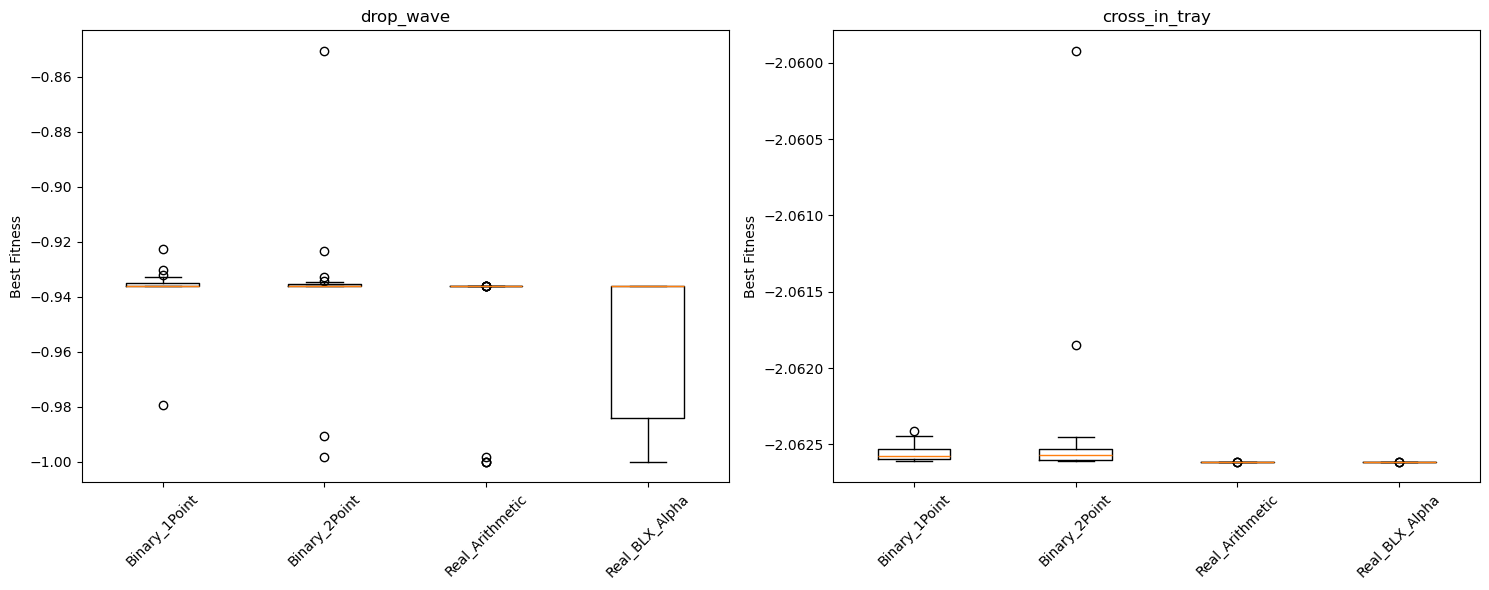

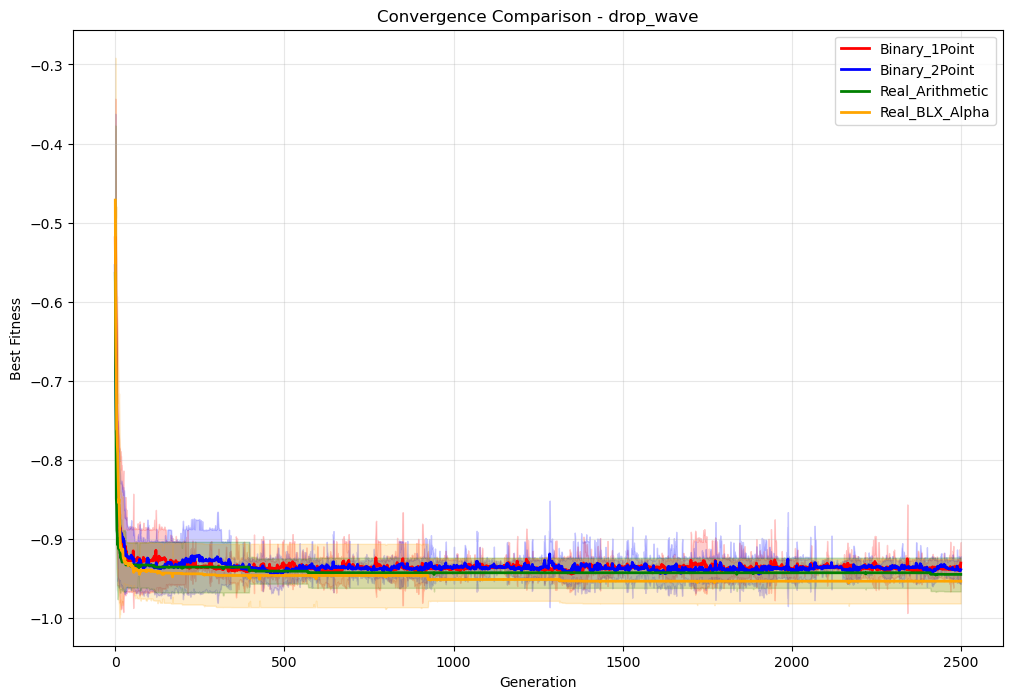

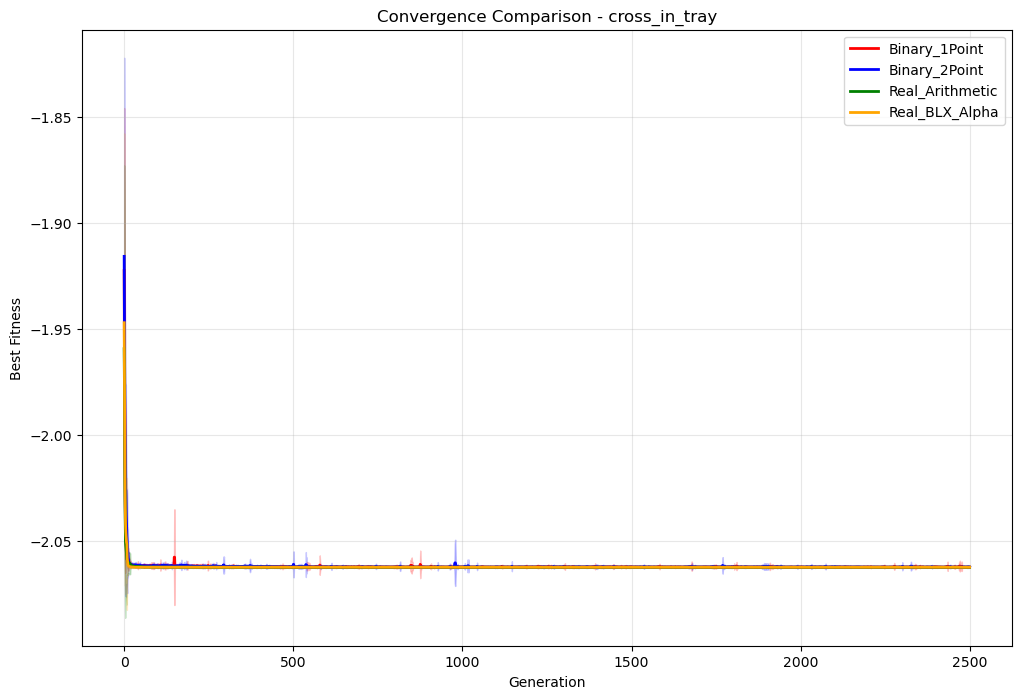

Results exported to ga_experiments_complete_summary.csv and ga_experiments_complete_detailed.csv

🎉 All experiments completed successfully!

Key findings will be in the summary statistics and visualizations above.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
import time
from scipy import stats

class ExperimentRunner:
    def __init__(self, 
                 fitness_functions: Dict[str, Callable],
                 bounds_dict: Dict[str, List[Tuple[float, float]]],
                 total_evaluations: int = 50000,
                 num_runs: int = 30):
        """
        Initialize experiment runner
        
        Args:
            fitness_functions: Dictionary of function name -> function
            bounds_dict: Dictionary of function name -> bounds
            total_evaluations: Fixed number of fitness evaluations across all configs
            num_runs: Number of independent runs per configuration
        """
        self.fitness_functions = fitness_functions
        self.bounds_dict = bounds_dict
        self.total_evaluations = total_evaluations
        self.num_runs = num_runs
        
        # Define all experimental configurations
        self.configurations = [
            {'representation': 'binary', 'crossover_type': '1point', 'name': 'Binary_1Point'},
            {'representation': 'binary', 'crossover_type': '2point', 'name': 'Binary_2Point'},
            {'representation': 'real', 'crossover_type': 'arithmetic', 'name': 'Real_Arithmetic'},
            {'representation': 'real', 'crossover_type': 'blx_alpha', 'name': 'Real_BLX_Alpha'}
        ]
        
        # Results storage
        self.results = {}
        
    def calculate_population_generations(self, target_evaluations: int = None):
        """Calculate population size and generations for fixed evaluations"""
        if target_evaluations is None:
            target_evaluations = self.total_evaluations
            
        # Try different population sizes and find suitable generations
        population_options = [20, 25, 50, 100]
        
        for pop_size in population_options:
            generations = target_evaluations // pop_size
            actual_evaluations = pop_size * generations
            
            if abs(actual_evaluations - target_evaluations) / target_evaluations < 0.05:  # Within 5%
                return pop_size, generations, actual_evaluations
        
        # Default fallback
        pop_size = 50
        generations = target_evaluations // pop_size
        actual_evaluations = pop_size * generations
        return pop_size, generations, actual_evaluations
    
    def run_single_experiment(self, function_name: str, config: Dict, run_id: int):
        """Run a single experiment configuration"""
        print(f"  Run {run_id + 1}/30: {config['name']}")
        
        # Calculate population and generations for fixed evaluations
        pop_size, generations, actual_evals = self.calculate_population_generations()
        
        # Set up GA parameters - REMOVE GENERATION PRINTS
        ga_params = {
            'fitness_function': self.fitness_functions[function_name],
            'bounds': self.bounds_dict[function_name],
            'population_size': pop_size,
            'num_generations': generations,
            'crossover_rate': 0.8,
            'mutation_rate': 0.1 if config['representation'] == 'real' else 0.05,
            'representation': config['representation'],
            'crossover_type': config['crossover_type'],
            'binary_bits': 16,
            'blx_alpha': 0.5,
            'tournament_size': 3,
            'maximize': False
        }
        
        # Create GA but modify to remove prints
        ga = GeneticAlgorithmSilent(**ga_params)  # Use silent version
        start_time = time.time()
        best_solution, best_fitness = ga.evolve()
        end_time = time.time()
        
        return {
            'function': function_name,
            'configuration': config['name'],
            'run_id': run_id,
            'best_solution': best_solution,
            'best_fitness': best_fitness,
            'convergence_history': ga.best_fitness_history,
            'execution_time': end_time - start_time,
            'actual_evaluations': actual_evals,
            'population_size': pop_size,
            'generations': generations
        }
    
    def run_all_experiments(self):
        """Run all experimental configurations"""
        print("Starting comprehensive GA experiments...")
        print(f"Target evaluations per run: {self.total_evaluations}")
        print(f"Independent runs per configuration: {self.num_runs}")
        print("=" * 60)
        
        for function_name in self.fitness_functions.keys():
            print(f"\nTesting function: {function_name}")
            self.results[function_name] = {}
            
            for config in self.configurations:
                print(f"\nConfiguration: {config['name']}")
                config_results = []
                
                for run_id in range(self.num_runs):
                    try:
                        result = self.run_single_experiment(function_name, config, run_id)
                        config_results.append(result)
                    except Exception as e:
                        print(f"    Error in run {run_id + 1}: {e}")
                        continue
                
                self.results[function_name][config['name']] = config_results
                
                # Quick statistics for this configuration
                if config_results:
                    best_fitness_values = [r['best_fitness'] for r in config_results]
                    print(f"    Mean: {np.mean(best_fitness_values):.6f}")
                    print(f"    Std:  {np.std(best_fitness_values):.6f}")
                    print(f"    Best: {np.min(best_fitness_values):.6f}")
        
        print("\n" + "=" * 60)
        print("All experiments completed!")
    
    def create_summary_statistics(self):
        """Create comprehensive summary statistics"""
        summary_data = []
        
        for function_name, function_results in self.results.items():
            for config_name, runs in function_results.items():
                if not runs:
                    continue
                    
                fitness_values = [run['best_fitness'] for run in runs]
                execution_times = [run['execution_time'] for run in runs]
                
                # Calculate statistics
                stats_dict = {
                    'Function': function_name,
                    'Configuration': config_name,
                    'Mean_Fitness': np.mean(fitness_values),
                    'Std_Fitness': np.std(fitness_values),
                    'Best_Fitness': np.min(fitness_values),
                    'Worst_Fitness': np.max(fitness_values),
                    'Median_Fitness': np.median(fitness_values),
                    'Mean_Time': np.mean(execution_times),
                    'Std_Time': np.std(execution_times),
                    'Success_Rate': len(runs) / self.num_runs,
                    'Num_Runs': len(runs)
                }
                
                summary_data.append(stats_dict)
        
        return pd.DataFrame(summary_data)
    
    def statistical_tests(self):
        """Perform statistical significance tests between configurations"""
        print("\nStatistical Significance Tests (Wilcoxon Rank-Sum)")
        print("=" * 60)
        
        for function_name, function_results in self.results.items():
            print(f"\nFunction: {function_name}")
            
            # Get all configuration names and their fitness values
            config_names = list(function_results.keys())
            config_fitness = {}
            
            for config_name in config_names:
                runs = function_results[config_name]
                if runs:
                    config_fitness[config_name] = [run['best_fitness'] for run in runs]
            
            # Perform pairwise comparisons
            for i, config1 in enumerate(config_names):
                for j, config2 in enumerate(config_names[i+1:], i+1):
                    if config1 in config_fitness and config2 in config_fitness:
                        fitness1 = config_fitness[config1]
                        fitness2 = config_fitness[config2]
                        
                        # Wilcoxon rank-sum test
                        statistic, p_value = stats.ranksums(fitness1, fitness2)
                        significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
                        
                        print(f"  {config1} vs {config2}: p={p_value:.4f} {significance}")
    
    def plot_convergence_comparison(self, function_name: str):
        """Plot convergence curves for all configurations - FIXED VERSION"""
        plt.figure(figsize=(12, 8))
        
        if function_name not in self.results:
            print(f"No results found for function: {function_name}")
            return
            
        function_results = self.results[function_name]
        colors = ['red', 'blue', 'green', 'orange']
        
        plotted_any = False
        for idx, (config_name, runs) in enumerate(function_results.items()):
            if not runs:
                print(f"No runs found for configuration: {config_name}")
                continue
                
            # Calculate mean convergence curve
            min_length = min(len(run['convergence_history']) for run in runs if run['convergence_history'])
            if min_length == 0:
                continue
                
            convergence_curves = []
            for run in runs:
                if run['convergence_history'] and len(run['convergence_history']) >= min_length:
                    curve = run['convergence_history'][:min_length]
                    convergence_curves.append(curve)
            
            if not convergence_curves:
                continue
                
            mean_curve = np.mean(convergence_curves, axis=0)
            std_curve = np.std(convergence_curves, axis=0)
            
            generations = range(len(mean_curve))
            
            plt.plot(generations, mean_curve, color=colors[idx % len(colors)], label=config_name, linewidth=2)
            plt.fill_between(generations, 
                           mean_curve - std_curve, 
                           mean_curve + std_curve, 
                           alpha=0.2, color=colors[idx % len(colors)])
            plotted_any = True
        
        if plotted_any:
            plt.xlabel('Generation')
            plt.ylabel('Best Fitness')
            plt.title(f'Convergence Comparison - {function_name}')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.show()
        else:
            print(f"No data to plot for {function_name}")
    
    def plot_box_plots(self):
        """Create box plots comparing all configurations - FIXED VERSION"""
        num_functions = len(self.fitness_functions)
        if num_functions == 0:
            print("No functions to plot")
            return
            
        fig, axes = plt.subplots(1, num_functions, figsize=(15, 6))
        if num_functions == 1:
            axes = [axes]
        
        for idx, (function_name, function_results) in enumerate(self.results.items()):
            data_for_plot = []
            labels_for_plot = []
            
            for config_name, runs in function_results.items():
                if runs:
                    fitness_values = [run['best_fitness'] for run in runs]
                    if fitness_values:  # Only add if we have data
                        data_for_plot.append(fitness_values)
                        labels_for_plot.append(config_name)
            
            if data_for_plot:  # Only plot if we have data
                box_plot = axes[idx].boxplot(data_for_plot, tick_labels=labels_for_plot)  # Fixed: tick_labels instead of labels
                axes[idx].set_title(f'{function_name}')
                axes[idx].set_ylabel('Best Fitness')
                axes[idx].tick_params(axis='x', rotation=45)
                
                # Check if all values are negative before applying log scale
                all_data = [val for sublist in data_for_plot for val in sublist]
                if all(val < 0 for val in all_data):
                    # For negative values, we can plot absolute values on log scale
                    # Or just use linear scale
                    print(f"Note: {function_name} has negative fitness values, using linear scale")
                else:
                    axes[idx].set_yscale('log')
            else:
                axes[idx].text(0.5, 0.5, 'No Data', transform=axes[idx].transAxes, 
                              ha='center', va='center', fontsize=12)
                axes[idx].set_title(f'{function_name} - No Data')
        
        plt.tight_layout()
        plt.show()
    
    def export_results(self, filename_prefix: str = "ga_experiments"):
        """Export results to CSV files"""
        # Summary statistics
        summary_df = self.create_summary_statistics()
        summary_df.to_csv(f"{filename_prefix}_summary.csv", index=False)
        
        # Detailed results
        detailed_data = []
        for function_name, function_results in self.results.items():
            for config_name, runs in function_results.items():
                for run in runs:
                    detailed_data.append({
                        'Function': function_name,
                        'Configuration': config_name,
                        'Run_ID': run['run_id'],
                        'Best_Fitness': run['best_fitness'],
                        'Execution_Time': run['execution_time'],
                        'Best_Solution_X1': run['best_solution'][0],
                        'Best_Solution_X2': run['best_solution'][1],
                        'Actual_Evaluations': run['actual_evaluations']
                    })
        
        detailed_df = pd.DataFrame(detailed_data)
        detailed_df.to_csv(f"{filename_prefix}_detailed.csv", index=False)
        
        print(f"Results exported to {filename_prefix}_summary.csv and {filename_prefix}_detailed.csv")


# Silent version of GA that doesn't print generation updates
class GeneticAlgorithmSilent(GeneticAlgorithm):
    def evolve(self):
        """Main evolution loop - SILENT VERSION"""
        # Initialize population
        population = self.initialize_population()
        
        for generation in range(self.num_generations):
            # Evaluate fitness
            fitness_values = self.evaluate_fitness(population)
            
            # Track statistics
            best_fitness = max(fitness_values)
            avg_fitness = np.mean(fitness_values)
            self.best_fitness_history.append(-best_fitness if not self.maximize else best_fitness)
            self.average_fitness_history.append(-avg_fitness if not self.maximize else avg_fitness)
            
            # NO PRINT STATEMENTS HERE - SILENT
            
            # Selection
            selected_population = self.tournament_selection(population, fitness_values)
            
            # Create new population through crossover and mutation
            new_population = []
            for i in range(0, self.population_size, 2):
                parent1 = selected_population[i]
                parent2 = selected_population[(i + 1) % self.population_size]
                
                offspring1, offspring2 = self.crossover(parent1, parent2)
                offspring1 = self.mutate(offspring1)
                offspring2 = self.mutate(offspring2)
                
                new_population.extend([offspring1, offspring2])
            
            # Ensure population size is maintained
            population = new_population[:self.population_size]
        
        # Final evaluation
        final_fitness = self.evaluate_fitness(population)
        best_index = np.argmax(final_fitness)
        best_individual = population[best_index]
        
        if self.representation == 'binary':
            best_real = self.binary_to_real(best_individual)
        else:
            best_real = best_individual
        
        best_fitness_value = -final_fitness[best_index] if not self.maximize else final_fitness[best_index]
        
        return best_real, best_fitness_value


# Run the complete experimental suite
def run_complete_experiments():
    """Run the complete experimental setup"""
    
    # Define test functions and bounds
    fitness_functions = {
        'drop_wave': drop_wave,
        'cross_in_tray': cross_in_tray
    }
    
    bounds_dict = {
        'drop_wave': [(-5.12, 5.12), (-5.12, 5.12)],
        'cross_in_tray': [(-10, 10), (-10, 10)]
    }
    
    # Create experiment runner
    runner = ExperimentRunner(
        fitness_functions=fitness_functions,
        bounds_dict=bounds_dict,
        total_evaluations=50000,  # Fixed across all configurations
        num_runs=30  # 30 independent runs
    )
    
    # Run all experiments
    runner.run_all_experiments()
    
    # Generate comprehensive analysis
    print("\n" + "=" * 60)
    print("EXPERIMENTAL ANALYSIS")
    print("=" * 60)
    
    # Summary statistics
    summary_df = runner.create_summary_statistics()
    print("\nSummary Statistics:")
    print(summary_df.to_string(index=False))
    
    # Statistical significance tests
    runner.statistical_tests()
    
    # Create visualizations
    print("\nGenerating visualizations...")
    
    # Debug: Check if we have results
    print("Available results:", list(runner.results.keys()))
    for func_name, func_results in runner.results.items():
        print(f"{func_name}: {list(func_results.keys())}")
        for config_name, runs in func_results.items():
            print(f"  {config_name}: {len(runs)} runs")
            if runs:
                print(f"    Sample fitness: {runs[0]['best_fitness']}")
    
    # Box plots
    runner.plot_box_plots()
    
    # Convergence plots for each function
    for function_name in fitness_functions.keys():
        runner.plot_convergence_comparison(function_name)
    
    # Export results
    runner.export_results("ga_experiments_complete")
    
    return runner, summary_df


# Execute the complete experimental suite
if __name__ == "__main__":
    print("Starting Comprehensive Genetic Algorithm Experiments")
    print("Testing all combinations of representations and crossover methods")
    print("Fixed evaluations: 50,000 per configuration")
    print("Independent runs: 30 per configuration")
    print("Total experiments: 4 configurations × 2 functions × 30 runs = 240 experiments")
    print("\nThis may take several minutes to complete...")
    
    runner, summary = run_complete_experiments()
    
    print("\n🎉 All experiments completed successfully!")
    print("\nKey findings will be in the summary statistics and visualizations above.")

In [7]:
def create_performance_ranking(summary_df):
    """Create performance ranking for each function"""
    print("\nPERFORMANCE RANKING")
    print("=" * 40)
    
    for function in summary_df['Function'].unique():
        func_data = summary_df[summary_df['Function'] == function].copy()
        func_data = func_data.sort_values('Mean_Fitness')
        
        print(f"\n{function} - Ranking by Mean Fitness:")
        for idx, (_, row) in enumerate(func_data.iterrows(), 1):
            print(f"  {idx}. {row['Configuration']}: {row['Mean_Fitness']:.6f} (±{row['Std_Fitness']:.6f})")

def create_convergence_analysis(runner):
    """Analyze convergence characteristics"""
    print("\nCONVERGENCE ANALYSIS")
    print("=" * 40)
    
    for function_name, function_results in runner.results.items():
        print(f"\n{function_name}:")
        
        for config_name, runs in function_results.items():
            if not runs:
                continue
                
            # Calculate convergence metrics
            final_improvements = []
            convergence_speeds = []
            
            for run in runs:
                history = run['convergence_history']
                if len(history) > 10:
                    # Final improvement (last 10% of generations)
                    final_10_percent = int(len(history) * 0.9)
                    final_improvement = history[final_10_percent] - history[-1]
                    final_improvements.append(final_improvement)
                    
                    # Convergence speed (generation where 90% of final improvement achieved)
                    target_fitness = history[0] + 0.9 * (history[-1] - history[0])
                    convergence_gen = len(history)
                    for i, fitness in enumerate(history):
                        if fitness <= target_fitness:
                            convergence_gen = i
                            break
                    convergence_speeds.append(convergence_gen)
            
            if final_improvements:
                print(f"  {config_name}:")
                print(f"    Avg convergence generation: {np.mean(convergence_speeds):.1f}")
                print(f"    Avg final improvement: {np.mean(final_improvements):.6f}")

# Run additional analysis
def run_additional_analysis(runner, summary_df):
    """Run additional analysis on experimental results"""
    create_performance_ranking(summary_df)
    create_convergence_analysis(runner)
    
    # Configuration recommendations
    print("\nRECOMMENDATIONS")
    print("=" * 40)
    
    for function in summary_df['Function'].unique():
        func_data = summary_df[summary_df['Function'] == function]
        best_config = func_data.loc[func_data['Mean_Fitness'].idxmin()]
        
        print(f"\n{function}:")
        print(f"  Best configuration: {best_config['Configuration']}")
        print(f"  Mean fitness: {best_config['Mean_Fitness']:.6f}")
        print(f"  Standard deviation: {best_config['Std_Fitness']:.6f}")
        print(f"  Best run fitness: {best_config['Best_Fitness']:.6f}")

# To run everything:
# runner, summary = run_complete_experiments() # commented out because we ran it above
run_additional_analysis(runner, summary)


PERFORMANCE RANKING

drop_wave - Ranking by Mean Fitness:
  1. Real_BLX_Alpha: -0.953247 (±0.028193)
  2. Real_Arithmetic: -0.944683 (±0.021520)
  3. Binary_2Point: -0.936420 (±0.021863)
  4. Binary_1Point: -0.936337 (±0.008439)

cross_in_tray - Ranking by Mean Fitness:
  1. Real_BLX_Alpha: -2.062612 (±0.000000)
  2. Real_Arithmetic: -2.062612 (±0.000000)
  3. Binary_1Point: -2.062556 (±0.000055)
  4. Binary_2Point: -2.062455 (±0.000489)

CONVERGENCE ANALYSIS

drop_wave:
  Binary_1Point:
    Avg convergence generation: 14.6
    Avg final improvement: -0.008157
  Binary_2Point:
    Avg convergence generation: 114.0
    Avg final improvement: 0.004000
  Real_Arithmetic:
    Avg convergence generation: 85.2
    Avg final improvement: 0.002062
  Real_BLX_Alpha:
    Avg convergence generation: 55.4
    Avg final improvement: 0.000000

cross_in_tray:
  Binary_1Point:
    Avg convergence generation: 4.9
    Avg final improvement: 0.000048
  Binary_2Point:
    Avg convergence generation: 11.3

## 5. Statistical Analysis


COMPREHENSIVE STATISTICAL ANALYSIS REPORT

Function: drop_wave
  Binary_1Point:
    Mean ± Std: -0.936337 ± 0.008584
    Best: -0.979458
    95% CI: [-0.939543, -0.933132]
  Binary_2Point:
    Mean ± Std: -0.936420 ± 0.022237
    Best: -0.998278
    95% CI: [-0.944724, -0.928117]
  Real_Arithmetic:
    Mean ± Std: -0.944683 ± 0.021888
    Best: -1.000000
    95% CI: [-0.952856, -0.936510]
  Real_BLX_Alpha:
    Mean ± Std: -0.953247 ± 0.028675
    Best: -1.000000
    95% CI: [-0.963954, -0.942539]

Function: cross_in_tray
  Binary_1Point:
    Mean ± Std: -2.062556 ± 0.000056
    Best: -2.062612
    95% CI: [-2.062577, -2.062535]
  Binary_2Point:
    Mean ± Std: -2.062455 ± 0.000498
    Best: -2.062612
    95% CI: [-2.062641, -2.062269]
  Real_Arithmetic:
    Mean ± Std: -2.062612 ± 0.000000
    Best: -2.062612
    95% CI: [-2.062612, -2.062612]
  Real_BLX_Alpha:
    Mean ± Std: -2.062612 ± 0.000000
    Best: -2.062612
    95% CI: [-2.062612, -2.062612]

Testing Statistical Assumptions.

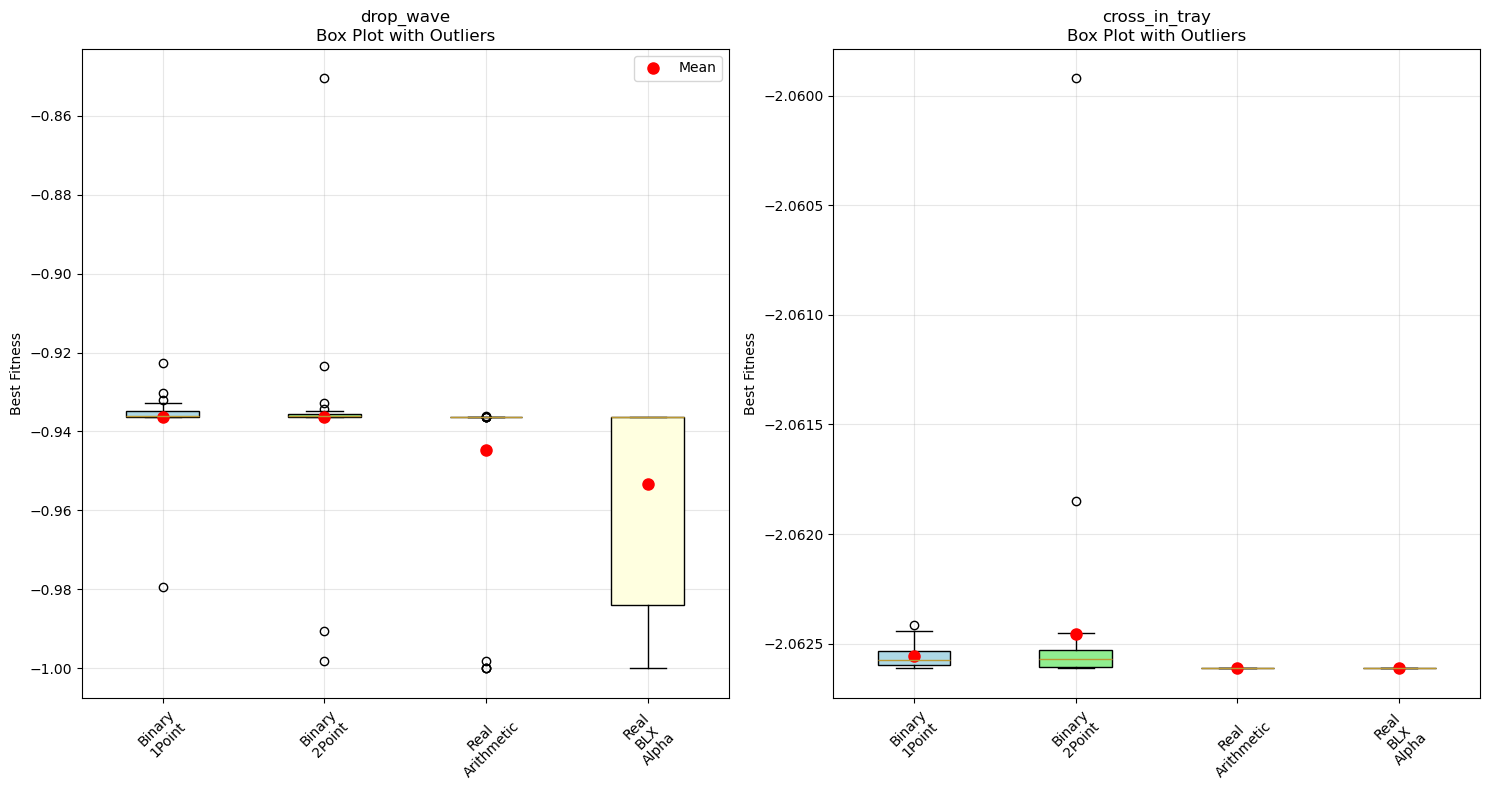

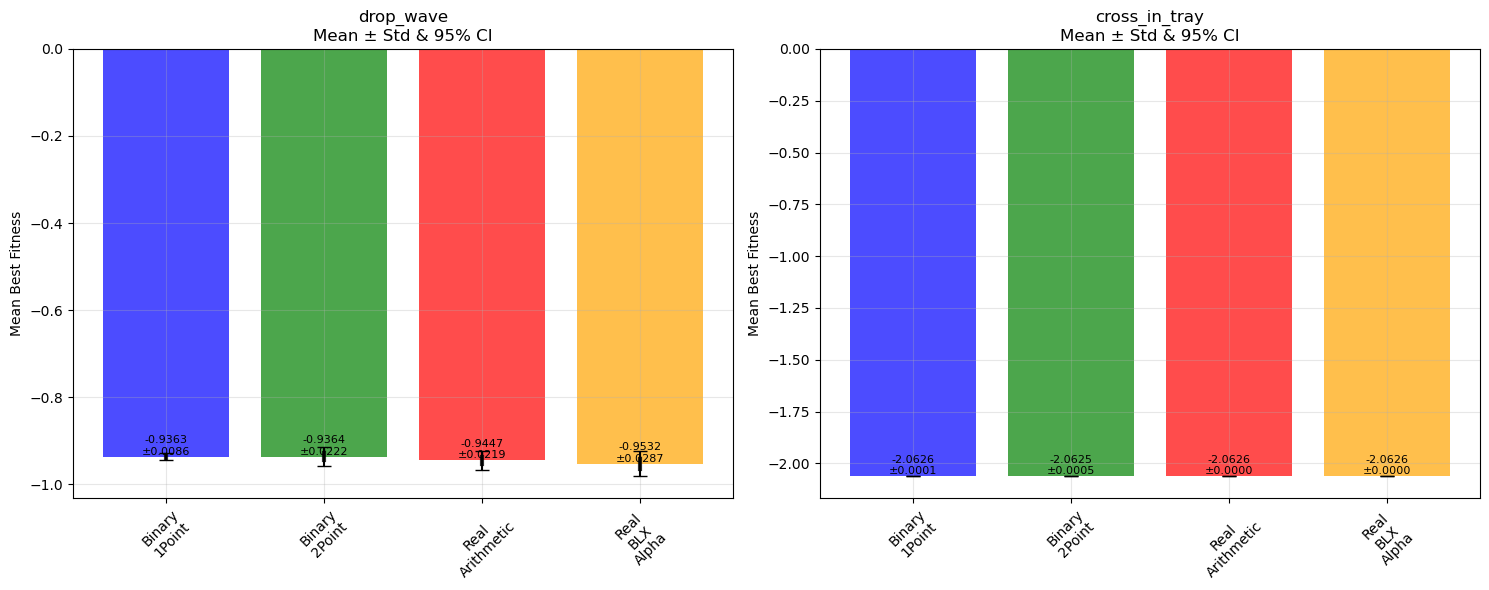

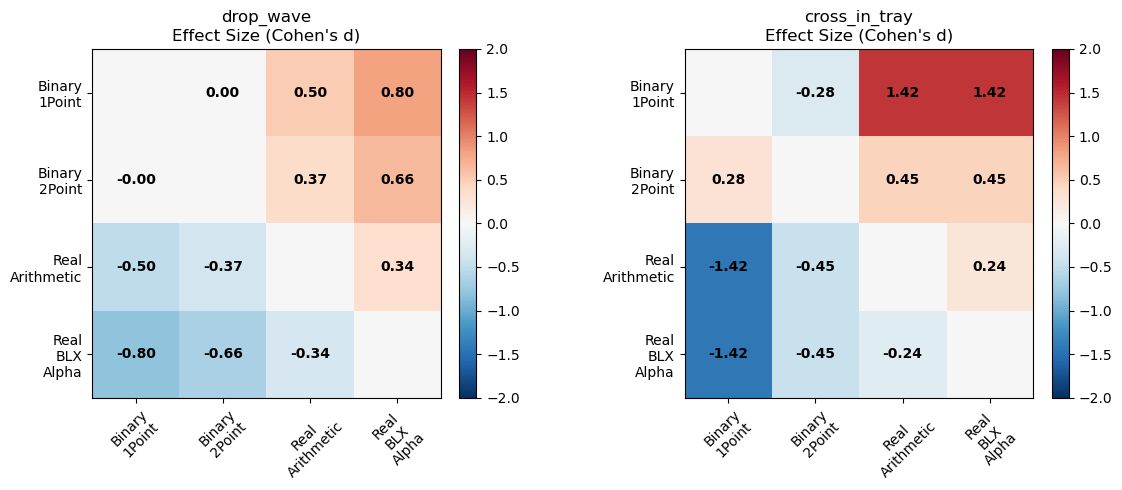

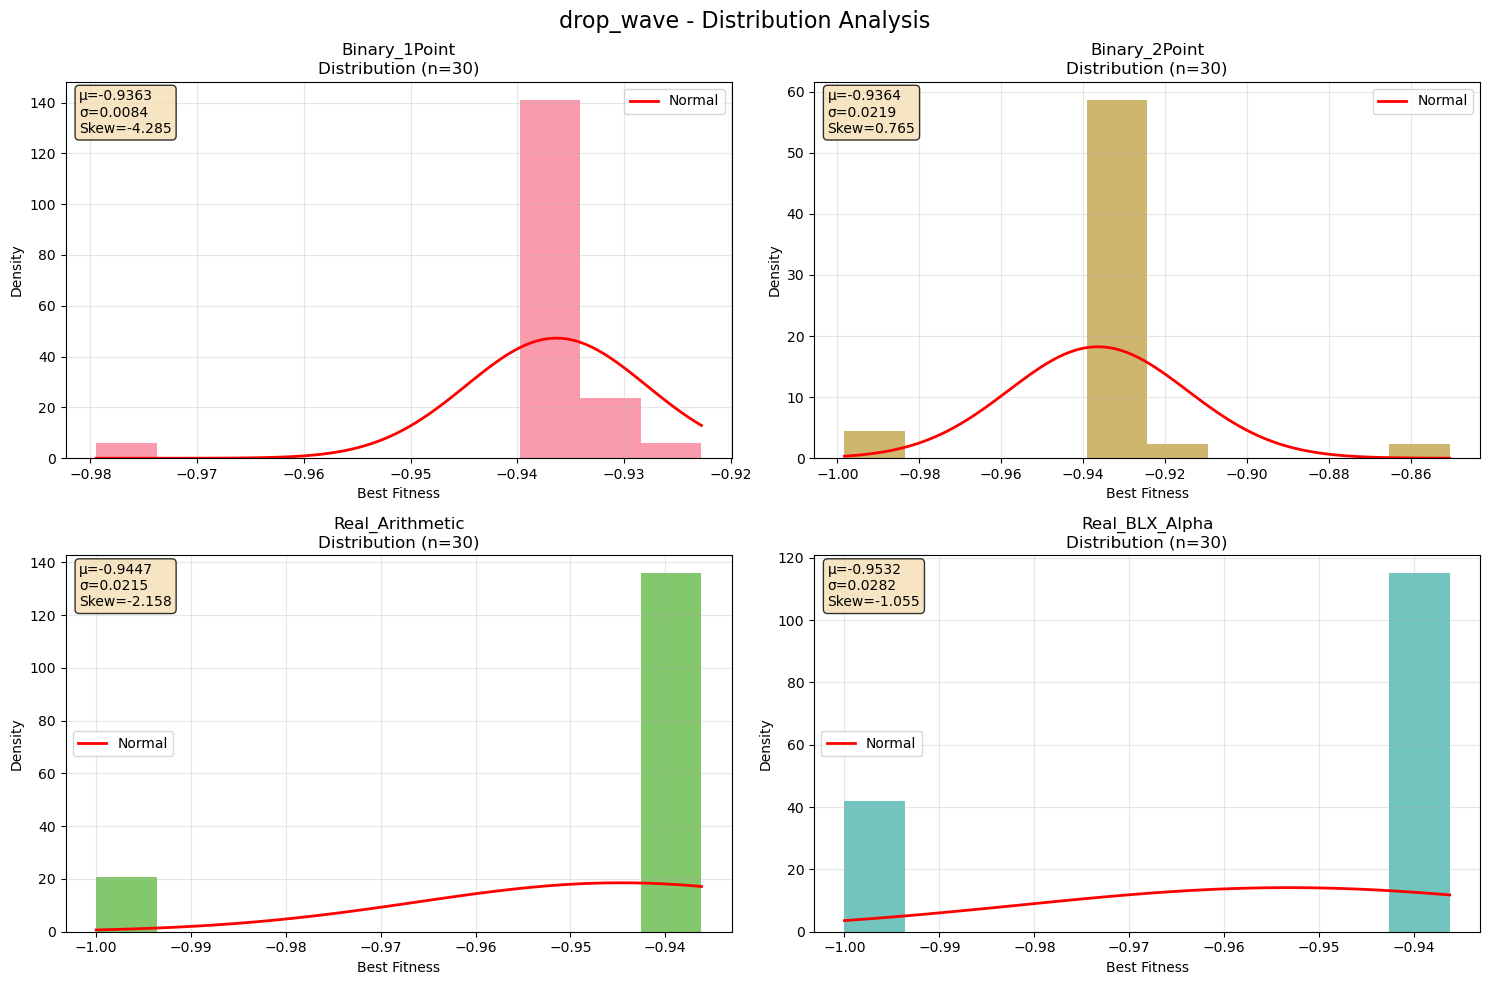

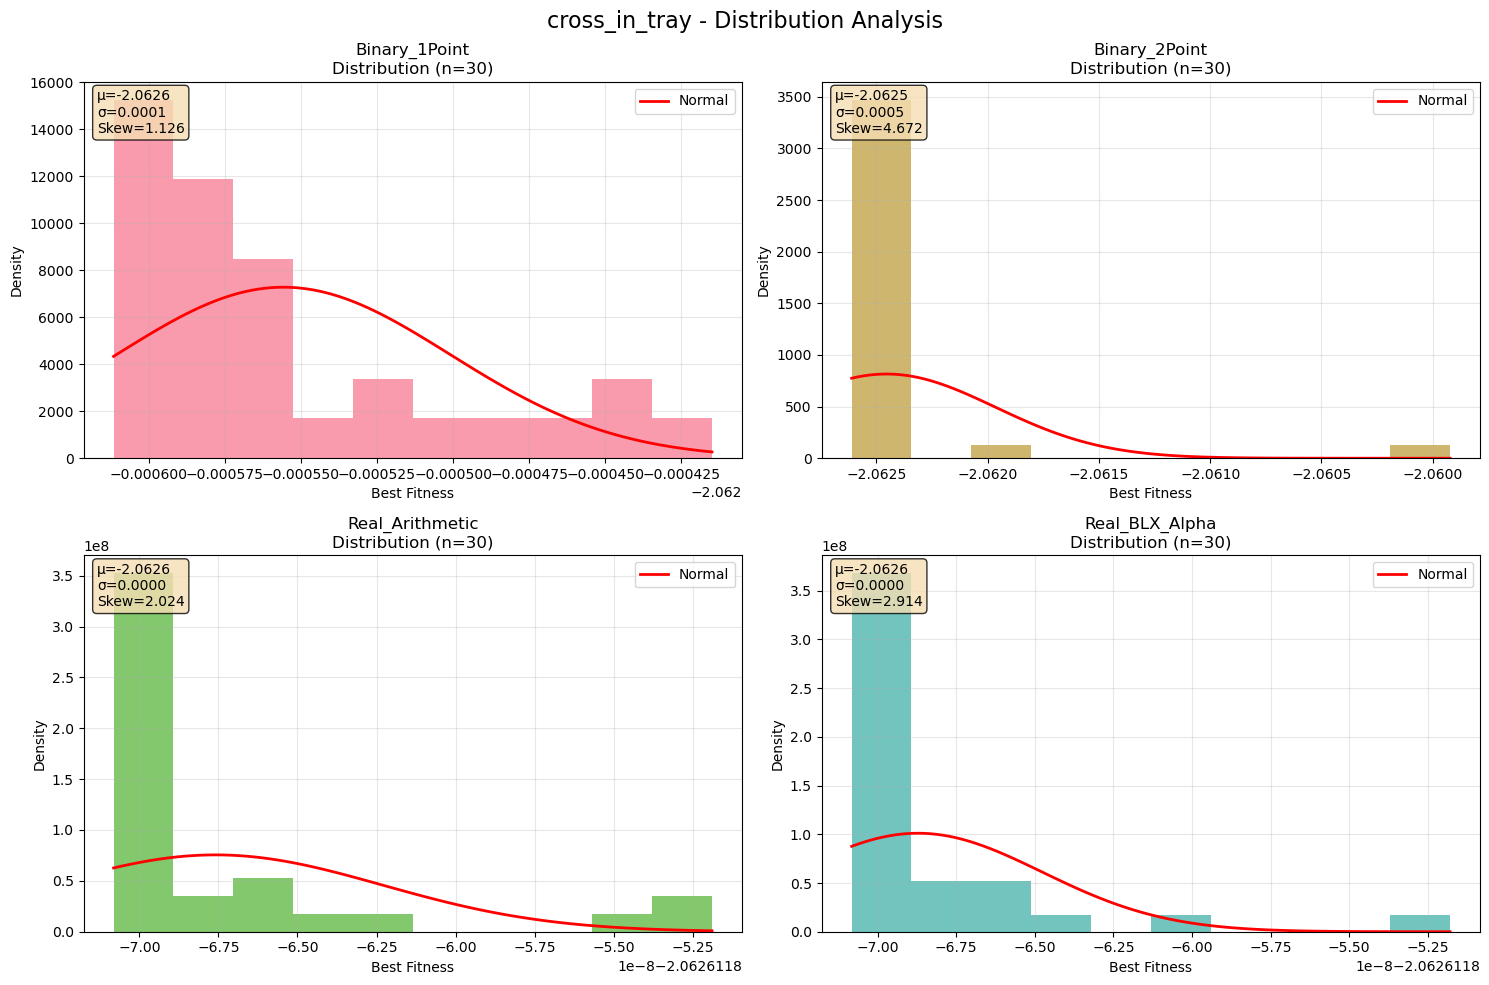

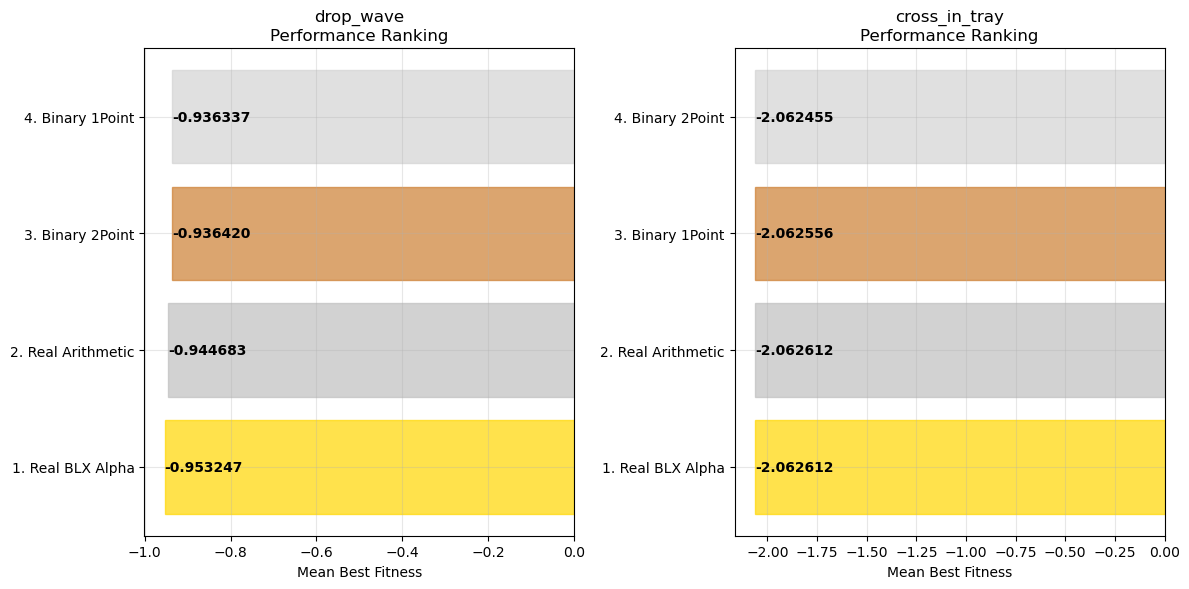


EXECUTIVE SUMMARY

drop_wave:
  🏆 Best Configuration: Real_BLX_Alpha
  📊 Mean Fitness: -0.953247 ± 0.028675
  🎯 Best Run: -1.000000
  📈 Success Rate: 100.0%
  🧪 Overall Significance: p=0.0000 (Significant)

cross_in_tray:
  🏆 Best Configuration: Real_BLX_Alpha
  📊 Mean Fitness: -2.062612 ± 0.000000
  🎯 Best Run: -2.062612
  📈 Success Rate: 100.0%
  🧪 Overall Significance: p=0.0000 (Significant)

📁 Results exported to CSV files
✅ Statistical analysis complete!


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import normaltest, shapiro, levene, kruskal, friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.contingency_tables import mcnemar
import warnings
warnings.filterwarnings('ignore')

class StatisticalAnalyzer:
    def __init__(self, experiment_runner):
        """
        Initialize statistical analyzer with experiment results
        
        Args:
            experiment_runner: ExperimentRunner object with completed experiments
        """
        self.runner = experiment_runner
        self.results = experiment_runner.results
        self.alpha = 0.05  # Significance level
        
        # Performance metrics storage
        self.performance_metrics = {}
        self.statistical_tests_results = {}
        
    def collect_performance_metrics(self):
        """Collect comprehensive performance metrics for all configurations"""
        print("Collecting Performance Metrics...")
        print("=" * 50)
        
        metrics_data = []
        
        for function_name, function_results in self.results.items():
            print(f"\nFunction: {function_name}")
            
            for config_name, runs in function_results.items():
                if not runs:
                    continue
                    
                fitness_values = [run['best_fitness'] for run in runs]
                execution_times = [run['execution_time'] for run in runs]
                
                # Basic statistics
                metrics = {
                    'Function': function_name,
                    'Configuration': config_name,
                    'Sample_Size': len(fitness_values),
                    'Mean_Fitness': np.mean(fitness_values),
                    'Std_Fitness': np.std(fitness_values, ddof=1),  # Sample std
                    'Best_Fitness': np.min(fitness_values),
                    'Worst_Fitness': np.max(fitness_values),
                    'Median_Fitness': np.median(fitness_values),
                    'Q1_Fitness': np.percentile(fitness_values, 25),
                    'Q3_Fitness': np.percentile(fitness_values, 75),
                    'IQR_Fitness': np.percentile(fitness_values, 75) - np.percentile(fitness_values, 25),
                    'Range_Fitness': np.max(fitness_values) - np.min(fitness_values),
                    'CV_Fitness': np.std(fitness_values, ddof=1) / np.abs(np.mean(fitness_values)) * 100,  # Coefficient of variation
                    'Skewness': stats.skew(fitness_values),
                    'Kurtosis': stats.kurtosis(fitness_values),
                    'Mean_Time': np.mean(execution_times),
                    'Std_Time': np.std(execution_times, ddof=1),
                    'Success_Rate': len(runs) / self.runner.num_runs * 100
                }
                
                # Confidence intervals (95%)
                se_fitness = stats.sem(fitness_values)
                ci_fitness = stats.t.interval(0.95, len(fitness_values)-1, loc=np.mean(fitness_values), scale=se_fitness)
                metrics['CI_Lower'] = ci_fitness[0]
                metrics['CI_Upper'] = ci_fitness[1]
                
                metrics_data.append(metrics)
                
                print(f"  {config_name}:")
                print(f"    Mean ± Std: {metrics['Mean_Fitness']:.6f} ± {metrics['Std_Fitness']:.6f}")
                print(f"    Best: {metrics['Best_Fitness']:.6f}")
                print(f"    95% CI: [{metrics['CI_Lower']:.6f}, {metrics['CI_Upper']:.6f}]")
        
        self.performance_metrics = pd.DataFrame(metrics_data)
        return self.performance_metrics
    
    def test_normality_and_homogeneity(self):
        """Test normality and homogeneity of variance assumptions"""
        print("\nTesting Statistical Assumptions...")
        print("=" * 50)
        
        assumption_results = {}
        
        for function_name, function_results in self.results.items():
            print(f"\nFunction: {function_name}")
            assumption_results[function_name] = {}
            
            # Collect all fitness data for this function
            all_fitness_data = []
            group_labels = []
            
            for config_name, runs in function_results.items():
                if runs:
                    fitness_values = [run['best_fitness'] for run in runs]
                    all_fitness_data.extend(fitness_values)
                    group_labels.extend([config_name] * len(fitness_values))
                    
                    # Test normality for each group
                    if len(fitness_values) >= 8:  # Minimum for Shapiro-Wilk
                        shapiro_stat, shapiro_p = shapiro(fitness_values)
                        assumption_results[function_name][config_name] = {
                            'shapiro_stat': shapiro_stat,
                            'shapiro_p': shapiro_p,
                            'normal': shapiro_p > self.alpha
                        }
                        
                        print(f"  {config_name} - Shapiro-Wilk: p={shapiro_p:.4f} {'(Normal)' if shapiro_p > self.alpha else '(Non-normal)'}")
            
            # Test homogeneity of variance (Levene's test)
            if len(set(group_labels)) > 1:
                groups = []
                for config_name, runs in function_results.items():
                    if runs:
                        fitness_values = [run['best_fitness'] for run in runs]
                        groups.append(fitness_values)
                
                if len(groups) > 1:
                    levene_stat, levene_p = levene(*groups)
                    assumption_results[function_name]['levene'] = {
                        'statistic': levene_stat,
                        'p_value': levene_p,
                        'equal_variance': levene_p > self.alpha
                    }
                    
                    print(f"  Levene's test (equal variance): p={levene_p:.4f} {'(Equal)' if levene_p > self.alpha else '(Unequal)'}")
        
        self.assumption_results = assumption_results
        return assumption_results
    
    def perform_statistical_tests(self):
        """Perform comprehensive statistical tests"""
        print("\nPerforming Statistical Tests...")
        print("=" * 50)
        
        test_results = {}
        
        for function_name, function_results in self.results.items():
            print(f"\nFunction: {function_name}")
            test_results[function_name] = {}
            
            # Prepare data for testing
            groups = []
            group_names = []
            all_data = []
            
            for config_name, runs in function_results.items():
                if runs:
                    fitness_values = [run['best_fitness'] for run in runs]
                    groups.append(fitness_values)
                    group_names.append(config_name)
                    all_data.extend(fitness_values)
            
            if len(groups) < 2:
                continue
            
            # 1. ANOVA (parametric) vs Kruskal-Wallis (non-parametric)
            # Check if we should use parametric or non-parametric tests
            use_parametric = True
            if function_name in self.assumption_results:
                # Check normality for all groups
                normal_groups = 0
                total_groups = 0
                for config_name in group_names:
                    if config_name in self.assumption_results[function_name]:
                        total_groups += 1
                        if self.assumption_results[function_name][config_name]['normal']:
                            normal_groups += 1
                
                # Use non-parametric if less than 75% of groups are normal
                if total_groups > 0 and (normal_groups / total_groups) < 0.75:
                    use_parametric = False
                
                # Also check equal variance
                if 'levene' in self.assumption_results[function_name]:
                    if not self.assumption_results[function_name]['levene']['equal_variance']:
                        use_parametric = False
            
            if use_parametric:
                # One-way ANOVA
                f_stat, anova_p = stats.f_oneway(*groups)
                test_results[function_name]['anova'] = {
                    'statistic': f_stat,
                    'p_value': anova_p,
                    'significant': anova_p < self.alpha,
                    'test_type': 'One-way ANOVA'
                }
                print(f"  One-way ANOVA: F={f_stat:.4f}, p={anova_p:.4f} {'*' if anova_p < self.alpha else ''}")
                
                # Post-hoc Tukey HSD if significant
                if anova_p < self.alpha:
                    # Prepare data for Tukey HSD
                    tukey_data = []
                    tukey_groups = []
                    for i, (group, name) in enumerate(zip(groups, group_names)):
                        tukey_data.extend(group)
                        tukey_groups.extend([name] * len(group))
                    
                    tukey_results = pairwise_tukeyhsd(tukey_data, tukey_groups, alpha=self.alpha)
                    test_results[function_name]['tukey'] = tukey_results
                    print("  Tukey HSD post-hoc test performed")
                    
            else:
                # Kruskal-Wallis test (non-parametric)
                h_stat, kw_p = kruskal(*groups)
                test_results[function_name]['kruskal_wallis'] = {
                    'statistic': h_stat,
                    'p_value': kw_p,
                    'significant': kw_p < self.alpha,
                    'test_type': 'Kruskal-Wallis'
                }
                print(f"  Kruskal-Wallis: H={h_stat:.4f}, p={kw_p:.4f} {'*' if kw_p < self.alpha else ''}")
            
            # 2. Pairwise comparisons
            pairwise_results = {}
            for i in range(len(groups)):
                for j in range(i+1, len(groups)):
                    group1, group2 = groups[i], groups[j]
                    name1, name2 = group_names[i], group_names[j]
                    
                    # Choose appropriate test
                    if use_parametric:
                        # Independent t-test
                        t_stat, t_p = stats.ttest_ind(group1, group2, equal_var=self.assumption_results[function_name].get('levene', {}).get('equal_variance', True))
                        test_name = "t-test"
                        statistic = t_stat
                        p_value = t_p
                    else:
                        # Mann-Whitney U test
                        u_stat, u_p = stats.mannwhitneyu(group1, group2, alternative='two-sided')
                        test_name = "Mann-Whitney U"
                        statistic = u_stat
                        p_value = u_p
                    
                    # Effect size (Cohen's d)
                    pooled_std = np.sqrt(((len(group1)-1)*np.var(group1, ddof=1) + (len(group2)-1)*np.var(group2, ddof=1)) / (len(group1)+len(group2)-2))
                    cohens_d = (np.mean(group1) - np.mean(group2)) / pooled_std if pooled_std > 0 else 0
                    
                    pairwise_results[f"{name1}_vs_{name2}"] = {
                        'test_type': test_name,
                        'statistic': statistic,
                        'p_value': p_value,
                        'significant': p_value < self.alpha,
                        'cohens_d': cohens_d,
                        'effect_size': self._interpret_effect_size(abs(cohens_d))
                    }
                    
                    print(f"  {name1} vs {name2}: {test_name} p={p_value:.4f} {'*' if p_value < self.alpha else ''}, d={cohens_d:.3f}")
            
            test_results[function_name]['pairwise'] = pairwise_results
        
        self.statistical_tests_results = test_results
        return test_results
    
    def _interpret_effect_size(self, d):
        """Interpret Cohen's d effect size"""
        if d < 0.2:
            return "Negligible"
        elif d < 0.5:
            return "Small"
        elif d < 0.8:
            return "Medium"
        else:
            return "Large"
    
    def create_performance_tables(self):
        """Create comprehensive performance tables"""
        print("\nCreating Performance Tables...")
        
        # Table 1: Summary Statistics
        summary_table = self.performance_metrics.pivot_table(
            index='Configuration',
            columns='Function',
            values=['Mean_Fitness', 'Std_Fitness', 'Best_Fitness'],
            aggfunc='first'
        )
        
        print("\nTable 1: Performance Summary")
        print("=" * 80)
        print(summary_table.round(6))
        
        # Table 2: Statistical Test Results Summary
        test_summary = []
        for function_name, tests in self.statistical_tests_results.items():
            if 'anova' in tests:
                test_summary.append({
                    'Function': function_name,
                    'Overall_Test': 'ANOVA',
                    'Statistic': tests['anova']['statistic'],
                    'P_Value': tests['anova']['p_value'],
                    'Significant': tests['anova']['significant']
                })
            elif 'kruskal_wallis' in tests:
                test_summary.append({
                    'Function': function_name,
                    'Overall_Test': 'Kruskal-Wallis',
                    'Statistic': tests['kruskal_wallis']['statistic'],
                    'P_Value': tests['kruskal_wallis']['p_value'],
                    'Significant': tests['kruskal_wallis']['significant']
                })
        
        test_summary_df = pd.DataFrame(test_summary)
        print("\nTable 2: Overall Statistical Tests")
        print("=" * 60)
        print(test_summary_df.round(6))
        
        # Table 3: Pairwise Comparisons
        pairwise_summary = []
        for function_name, tests in self.statistical_tests_results.items():
            if 'pairwise' in tests:
                for comparison, result in tests['pairwise'].items():
                    pairwise_summary.append({
                        'Function': function_name,
                        'Comparison': comparison.replace('_vs_', ' vs '),
                        'Test': result['test_type'],
                        'P_Value': result['p_value'],
                        'Significant': result['significant'],
                        'Cohens_D': result['cohens_d'],
                        'Effect_Size': result['effect_size']
                    })
        
        pairwise_df = pd.DataFrame(pairwise_summary)
        print("\nTable 3: Pairwise Comparisons")
        print("=" * 100)
        print(pairwise_df.round(6))
        
        return summary_table, test_summary_df, pairwise_df
    
    def create_statistical_visualizations(self):
        """Create comprehensive statistical visualizations"""
        print("\nCreating Statistical Visualizations...")
        
        # Set style
        plt.style.use('default')
        sns.set_palette("husl")
        
        # Figure 1: Box plots with statistical annotations
        self._create_box_plots_with_stats()
        
        # Figure 2: Mean comparison with confidence intervals
        self._create_mean_comparison_plot()
        
        # Figure 3: Effect size heatmap
        self._create_effect_size_heatmap()
        
        # Figure 4: Distribution plots
        self._create_distribution_plots()
        
        # Figure 5: Performance ranking
        self._create_performance_ranking_plot()
    
    def _create_box_plots_with_stats(self):
        """Create box plots with statistical significance annotations"""
        num_functions = len(self.results)
        fig, axes = plt.subplots(1, num_functions, figsize=(15, 8))
        if num_functions == 1:
            axes = [axes]
        
        for idx, (function_name, function_results) in enumerate(self.results.items()):
            data_for_plot = []
            labels_for_plot = []
            
            for config_name, runs in function_results.items():
                if runs:
                    fitness_values = [run['best_fitness'] for run in runs]
                    data_for_plot.append(fitness_values)
                    labels_for_plot.append(config_name.replace('_', '\n'))
            
            if data_for_plot:
                bp = axes[idx].boxplot(data_for_plot, tick_labels=labels_for_plot, patch_artist=True)
                
                # Color boxes
                colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow']
                for patch, color in zip(bp['boxes'], colors):
                    patch.set_facecolor(color)
                
                axes[idx].set_title(f'{function_name}\nBox Plot with Outliers')
                axes[idx].set_ylabel('Best Fitness')
                axes[idx].tick_params(axis='x', rotation=45)
                axes[idx].grid(True, alpha=0.3)
                
                # Add mean markers
                for i, data in enumerate(data_for_plot):
                    mean_val = np.mean(data)
                    axes[idx].plot(i+1, mean_val, 'ro', markersize=8, label='Mean' if i == 0 else "")
                
                if idx == 0:
                    axes[idx].legend()
        
        plt.tight_layout()
        plt.show()
    
    def _create_mean_comparison_plot(self):
        """Create mean comparison plot with confidence intervals"""
        fig, axes = plt.subplots(1, len(self.results), figsize=(15, 6))
        if len(self.results) == 1:
            axes = [axes]
        
        for idx, function_name in enumerate(self.results.keys()):
            func_data = self.performance_metrics[self.performance_metrics['Function'] == function_name]
            
            if not func_data.empty:
                x_pos = range(len(func_data))
                means = func_data['Mean_Fitness']
                stds = func_data['Std_Fitness']
                configs = func_data['Configuration']
                
                # Create bar plot with error bars
                bars = axes[idx].bar(x_pos, means, yerr=stds, capsize=5, alpha=0.7, 
                                   color=['blue', 'green', 'red', 'orange'])
                
                # Add confidence interval markers
                for i, (mean, ci_lower, ci_upper) in enumerate(zip(means, func_data['CI_Lower'], func_data['CI_Upper'])):
                    axes[idx].plot([i, i], [ci_lower, ci_upper], 'k-', linewidth=3, alpha=0.8)
                
                axes[idx].set_title(f'{function_name}\nMean ± Std & 95% CI')
                axes[idx].set_ylabel('Mean Best Fitness')
                axes[idx].set_xticks(x_pos)
                axes[idx].set_xticklabels([c.replace('_', '\n') for c in configs], rotation=45)
                axes[idx].grid(True, alpha=0.3)
                
                # Add value labels on bars
                for bar, mean, std in zip(bars, means, stds):
                    height = bar.get_height()
                    axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                                 f'{mean:.4f}\n±{std:.4f}',
                                 ha='center', va='bottom', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    
    def _create_effect_size_heatmap(self):
        """Create effect size heatmap for pairwise comparisons"""
        fig, axes = plt.subplots(1, len(self.results), figsize=(12, 5))
        if len(self.results) == 1:
            axes = [axes]
        
        for idx, function_name in enumerate(self.results.keys()):
            if function_name in self.statistical_tests_results and 'pairwise' in self.statistical_tests_results[function_name]:
                pairwise_results = self.statistical_tests_results[function_name]['pairwise']
                
                # Create matrix for effect sizes
                configs = list(self.results[function_name].keys())
                matrix = np.zeros((len(configs), len(configs)))
                
                for comparison, result in pairwise_results.items():
                    parts = comparison.split('_vs_')
                    if len(parts) == 2:
                        i = configs.index(parts[0])
                        j = configs.index(parts[1])
                        matrix[i, j] = result['cohens_d']
                        matrix[j, i] = -result['cohens_d']  # Negative for reverse comparison
                
                # Create heatmap
                im = axes[idx].imshow(matrix, cmap='RdBu_r', vmin=-2, vmax=2)
                axes[idx].set_title(f'{function_name}\nEffect Size (Cohen\'s d)')
                axes[idx].set_xticks(range(len(configs)))
                axes[idx].set_yticks(range(len(configs)))
                axes[idx].set_xticklabels([c.replace('_', '\n') for c in configs], rotation=45)
                axes[idx].set_yticklabels([c.replace('_', '\n') for c in configs])
                
                # Add text annotations
                for i in range(len(configs)):
                    for j in range(len(configs)):
                        if i != j:
                            text = axes[idx].text(j, i, f'{matrix[i, j]:.2f}',
                                               ha="center", va="center", color="black", fontweight='bold')
                
                # Add colorbar
                plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)
        
        plt.tight_layout()
        plt.show()
    
    def _create_distribution_plots(self):
        """Create distribution plots for each configuration"""
        for function_name, function_results in self.results.items():
            fig, axes = plt.subplots(2, 2, figsize=(15, 10))
            axes = axes.flatten()
            
            for idx, (config_name, runs) in enumerate(function_results.items()):
                if runs and idx < 4:
                    fitness_values = [run['best_fitness'] for run in runs]
                    
                    # Histogram with normal curve overlay
                    axes[idx].hist(fitness_values, bins=10, density=True, alpha=0.7, color=f'C{idx}')
                    
                    # Overlay normal distribution
                    mu, sigma = np.mean(fitness_values), np.std(fitness_values)
                    x = np.linspace(min(fitness_values), max(fitness_values), 100)
                    axes[idx].plot(x, stats.norm.pdf(x, mu, sigma), 'r-', linewidth=2, label='Normal')
                    
                    axes[idx].set_title(f'{config_name}\nDistribution (n={len(fitness_values)})')
                    axes[idx].set_xlabel('Best Fitness')
                    axes[idx].set_ylabel('Density')
                    axes[idx].legend()
                    axes[idx].grid(True, alpha=0.3)
                    
                    # Add statistics text
                    stats_text = f'μ={mu:.4f}\nσ={sigma:.4f}\nSkew={stats.skew(fitness_values):.3f}'
                    axes[idx].text(0.02, 0.98, stats_text, transform=axes[idx].transAxes, 
                                 verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
            
            plt.suptitle(f'{function_name} - Distribution Analysis', fontsize=16)
            plt.tight_layout()
            plt.show()
    
    def _create_performance_ranking_plot(self):
        """Create performance ranking visualization"""
        fig, axes = plt.subplots(1, len(self.results), figsize=(12, 6))
        if len(self.results) == 1:
            axes = [axes]
        
        for idx, function_name in enumerate(self.results.keys()):
            func_data = self.performance_metrics[self.performance_metrics['Function'] == function_name].copy()
            func_data = func_data.sort_values('Mean_Fitness')
            
            y_pos = range(len(func_data))
            means = func_data['Mean_Fitness']
            configs = func_data['Configuration']
            
            # Create horizontal bar plot
            bars = axes[idx].barh(y_pos, means, alpha=0.7)
            
            # Color bars by rank
            colors = ['gold', 'silver', '#CD7F32', 'lightgray']  # Gold, Silver, Bronze, Gray
            for bar, color in zip(bars, colors):
                bar.set_color(color)
            
            axes[idx].set_title(f'{function_name}\nPerformance Ranking')
            axes[idx].set_xlabel('Mean Best Fitness')
            axes[idx].set_yticks(y_pos)
            axes[idx].set_yticklabels([f'{i+1}. {c.replace("_", " ")}' for i, c in enumerate(configs)])
            axes[idx].grid(True, alpha=0.3)
            
            # Add value labels
            for bar, mean in zip(bars, means):
                width = bar.get_width()
                axes[idx].text(width, bar.get_y() + bar.get_height()/2,
                             f'{mean:.6f}', ha='left', va='center', fontweight='bold')
        
        plt.tight_layout()
        plt.show()
    
    def generate_comprehensive_report(self):
        """Generate a comprehensive statistical report"""
        print("\n" + "="*80)
        print("COMPREHENSIVE STATISTICAL ANALYSIS REPORT")
        print("="*80)
        
        # Collect metrics
        metrics_df = self.collect_performance_metrics()
        
        # Test assumptions
        assumptions = self.test_normality_and_homogeneity()
        
        # Perform tests
        test_results = self.perform_statistical_tests()
        
        # Create tables
        summary_table, test_summary_df, pairwise_df = self.create_performance_tables()
        
        # Create visualizations
        self.create_statistical_visualizations()
        
        # Final summary
        print("\n" + "="*60)
        print("EXECUTIVE SUMMARY")
        print("="*60)
        
        for function_name in self.results.keys():
            func_data = metrics_df[metrics_df['Function'] == function_name]
            best_config = func_data.loc[func_data['Mean_Fitness'].idxmin()]
            
            print(f"\n{function_name}:")
            print(f"  🏆 Best Configuration: {best_config['Configuration']}")
            print(f"  📊 Mean Fitness: {best_config['Mean_Fitness']:.6f} ± {best_config['Std_Fitness']:.6f}")
            print(f"  🎯 Best Run: {best_config['Best_Fitness']:.6f}")
            print(f"  📈 Success Rate: {best_config['Success_Rate']:.1f}%")
            
            # Statistical significance
            if function_name in test_results:
                if 'anova' in test_results[function_name]:
                    overall_p = test_results[function_name]['anova']['p_value']
                    print(f"  🧪 Overall Significance: p={overall_p:.4f} {'(Significant)' if overall_p < 0.05 else '(Not Significant)'}")
                elif 'kruskal_wallis' in test_results[function_name]:
                    overall_p = test_results[function_name]['kruskal_wallis']['p_value']
                    print(f"  🧪 Overall Significance: p={overall_p:.4f} {'(Significant)' if overall_p < 0.05 else '(Not Significant)'}")
        
        # Export results
        metrics_df.to_csv('statistical_analysis_metrics.csv', index=False)
        pairwise_df.to_csv('statistical_analysis_pairwise.csv', index=False)
        
        print(f"\n📁 Results exported to CSV files")
        print("✅ Statistical analysis complete!")
        
        return metrics_df, test_results, pairwise_df

# Usage with your experiment runner
def run_statistical_analysis(experiment_runner):
    """
    Run complete statistical analysis on experiment results
    
    Args:
        experiment_runner: ExperimentRunner object with completed experiments
    """
    analyzer = StatisticalAnalyzer(experiment_runner)
    return analyzer.generate_comprehensive_report()

# Example usage:
# Assuming you have run the experiments:
# runner, summary = run_complete_experiments() # commented out because we ran it above
metrics, tests, pairwise = run_statistical_analysis(runner)